## 1. 라이브러리 임포트

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import re

from nltk.corpus import stopwords
import nltk

from wordcloud import WordCloud,STOPWORDS

import keras
from keras.preprocessing import text,sequence
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM #,Dropout

from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
# from sklearn.utils.extmath import density
# from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

from bs4 import BeautifulSoup

## 2. 데이터 EDA & 전처리

In [2]:
true = pd.read_csv('./fakenews/True.csv')
fake = pd.read_csv('./fakenews/Fake.csv')

In [3]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
print(true.info())
print(fake.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
None


In [6]:
print(true.subject.value_counts())
print('\n')
print(fake.subject.value_counts())

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64


News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64


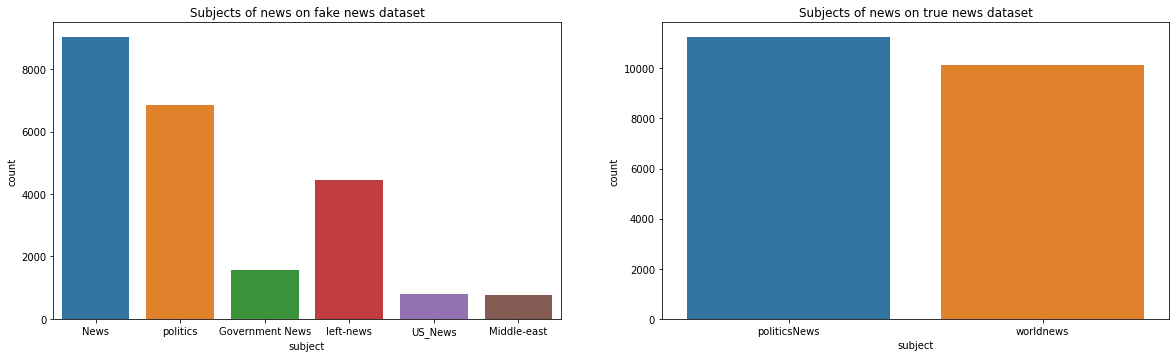

In [7]:
plt.figure(figsize=(20,12))

plt.subplot(2,2,1)
sns.countplot('subject',data=fake)
plt.title("Subjects of news on fake news dataset")

plt.subplot(2,2,2)
sns.countplot('subject',data=true)
plt.title("Subjects of news on true news dataset")

plt.show()

In [8]:
true['target'] = 1
fake['target'] = 0

data = pd.concat([true, fake], axis=0)
data = data.sample(frac=1).reset_index(drop=True)
data

,title,text,subject,date,target
0,HILLARY TRIES TO INJECT Social Class And Race ...,Maybe Hillary should be hiring someone to hand...,left-news,"Feb 6, 2016",0
1,Here’s How Trump’s VP Pick Lobbied To Screw T...,The minimum wage hasn t been raised for nearly...,News,"July 17, 2016",0
2,New Jersey mayor resigns after admitting corru...,"NEW YORK (Reuters) - The mayor of Paterson, Ne...",politicsNews,"September 25, 2017",1
3,JUDICIAL BIAS? LATINA SUPREME COURT JUSTICE De...,I would hope that a wise Latina woman with th...,Government News,"Jun 7, 2016",0
4,Trump applauds senators for new healthcare ref...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"September 13, 2017",1
...,...,...,...,...,...
44893,SHOCKING: Interviewer Shows Many Americans Hav...,The dumbing down of America This is how people...,Government News,"Jul 3, 2015",0
44894,Trump call for immigration legislation sparks ...,WASHINGTON (Reuters) - President Donald Trump’...,politicsNews,"September 7, 2017",1
44895,British foreign minister arrives in U.S. to me...,LONDON (Reuters) - Britain’s foreign minister ...,politicsNews,"January 8, 2017",1
44896,BLACK MEN FOR BERNIE FOUNDER Campaigns In Swin...,"Apparently, using thug Michael Ferguson s mom ...",left-news,"Aug 27, 2016",0


In [9]:
data.isnull().sum()

title      0
text       0
subject    0
date       0
target     0
dtype: int64

In [10]:
print(data["target"].value_counts())

0    23481
1    21417
Name: target, dtype: int64


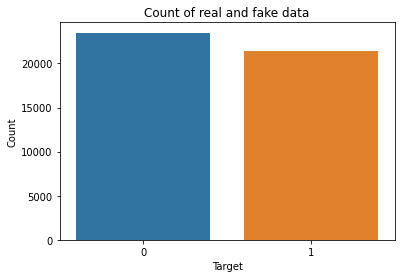

In [11]:
sns.countplot(data.target)
plt.title("Count of real and fake data")
plt.ylabel("Count")
plt.xlabel("Target")
plt.show()

In [12]:
data.drop('subject', axis=1)
data

,title,text,subject,date,target
0,HILLARY TRIES TO INJECT Social Class And Race ...,Maybe Hillary should be hiring someone to hand...,left-news,"Feb 6, 2016",0
1,Here’s How Trump’s VP Pick Lobbied To Screw T...,The minimum wage hasn t been raised for nearly...,News,"July 17, 2016",0
2,New Jersey mayor resigns after admitting corru...,"NEW YORK (Reuters) - The mayor of Paterson, Ne...",politicsNews,"September 25, 2017",1
3,JUDICIAL BIAS? LATINA SUPREME COURT JUSTICE De...,I would hope that a wise Latina woman with th...,Government News,"Jun 7, 2016",0
4,Trump applauds senators for new healthcare ref...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"September 13, 2017",1
...,...,...,...,...,...
44893,SHOCKING: Interviewer Shows Many Americans Hav...,The dumbing down of America This is how people...,Government News,"Jul 3, 2015",0
44894,Trump call for immigration legislation sparks ...,WASHINGTON (Reuters) - President Donald Trump’...,politicsNews,"September 7, 2017",1
44895,British foreign minister arrives in U.S. to me...,LONDON (Reuters) - Britain’s foreign minister ...,politicsNews,"January 8, 2017",1
44896,BLACK MEN FOR BERNIE FOUNDER Campaigns In Swin...,"Apparently, using thug Michael Ferguson s mom ...",left-news,"Aug 27, 2016",0


In [13]:
data['text']= data['subject'] + " " + data['title'] + " " + data['text']
del data['title']
del data['subject']
del data['date']
data.head()

,text,target
0,left-news HILLARY TRIES TO INJECT Social Class...,0
1,News Here’s How Trump’s VP Pick Lobbied To Sc...,0
2,politicsNews New Jersey mayor resigns after ad...,1
3,Government News JUDICIAL BIAS? LATINA SUPREME ...,0
4,politicsNews Trump applauds senators for new h...,1


In [14]:
data.to_csv('./data.csv')

In [15]:
data.text[100]

'politicsNews Major tech firms, internet providers clash over U.S. net neutrality rules WASHINGTON (Reuters) - Tech companies clashed with internet service providers on Monday over whether a landmark 2015 net neutrality order barring the blocking or slowing of web content should be scrapped by the U.S. Federal Communications Commission. A group representing major technology firms including Alphabet Inc (GOOGL.O) and Facebook Inc (FB.O) urged the FCC to abandon plans to rescind the rules barring internet service providers from hindering consumer access to web content or offering paid “fast lanes.” The Internet Association said in its filing with the FCC that dismantling the rules “will create significant uncertainty in the market and upset the careful balance that has led to the current virtuous circle of innovation in the broadband ecosystem.”  The rollback would harm consumers, added the group, which also represents Amazon.com Inc (AMZN.O), Microsoft Inc (MSFT.O), Netflix Inc (NFLX.O)

In [16]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/jeongdaun/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [17]:
#Removal of HTML Contents
def remove_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removal of Punctuation Marks
def remove_punctuations(text):
    return re.sub('\[[^]]*\]', '', text)

# Removal of Special Characters
def remove_characters(text):
    return re.sub("[^a-zA-Z]"," ",text)

#Removal of stopwords 
def remove_stopwords_and_lemmatization(text):
    final_text = []
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    for word in text:
        if word not in set(stopwords.words('english')):
            lemma = nltk.WordNetLemmatizer()
            word = lemma.lemmatize(word) 
            final_text.append(word)
    return " ".join(final_text)

#Total function
def cleaning(text):
    text = remove_html(text)
    text = remove_punctuations(text)
    text = remove_characters(text)
    text = remove_stopwords_and_lemmatization(text)
    return text

#Apply function on text column
data['text'] = data['text'].apply(cleaning)

In [18]:
data.head()

,text,target
0,left news hillary try inject social class race...,0
1,news trump vp pick lobbied screw poor video mi...,0
2,politicsnews new jersey mayor resigns admittin...,1
3,government news judicial bias latina supreme c...,0
4,politicsnews trump applauds senator new health...,1


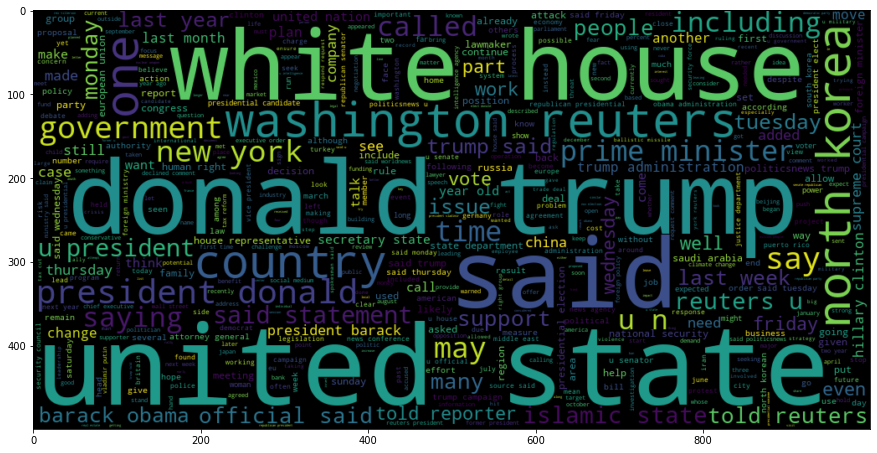

In [19]:
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 500 , width = 1000 , height = 500 , stopwords = STOPWORDS).generate(" ".join(data[data.target == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

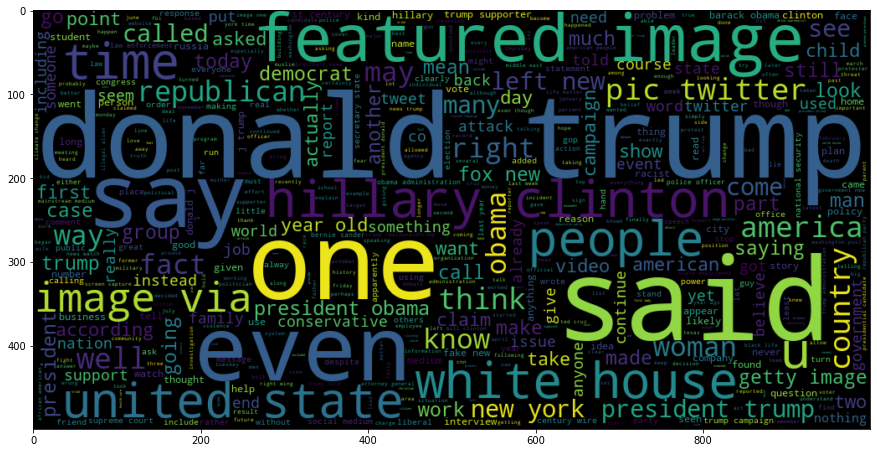

In [20]:
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 500 , width = 1000 , height = 500 , stopwords = STOPWORDS).generate(" ".join(data[data.target == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

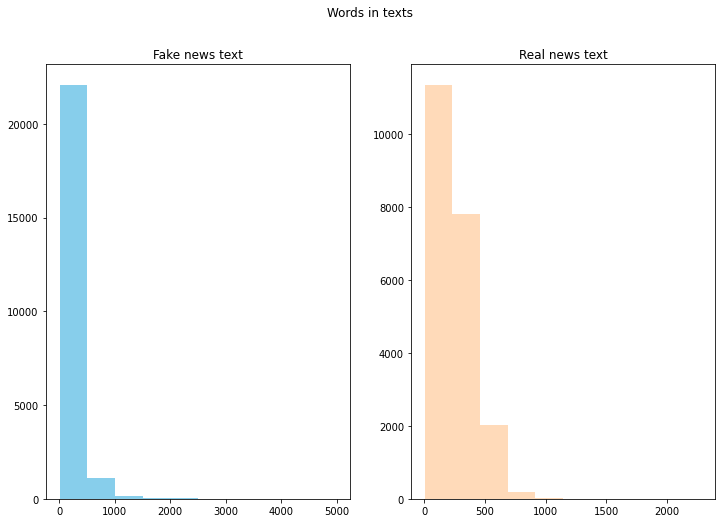

In [21]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=data[data['target']==0]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='SkyBlue')
ax1.set_title('Fake news text')
text_len=data[data['target']==1]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='PeachPuff')
ax2.set_title('Real news text')
fig.suptitle('Words in texts')
plt.show()

## 3. 모델링

In [22]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['target'], random_state=0)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33673,), (11225,), (33673,), (11225,))

In [24]:
max_features = 10000
maxlen = 300

tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)
tokenized_train = tokenizer.texts_to_sequences(X_train)
X_train = sequence.pad_sequences(tokenized_train, maxlen=maxlen)

In [25]:
tokenized_test = tokenizer.texts_to_sequences(X_test)
X_test = sequence.pad_sequences(tokenized_test, maxlen=maxlen)

In [26]:
batch_size = 256
epochs = 5
embed_size = 100

In [27]:
model = Sequential()

#Non-trainable embeddidng layer
model.add(Embedding(max_features, output_dim=embed_size, input_length=maxlen, trainable=False))

#LSTM 
model.add(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25))
model.add(LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.1))
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

2022-02-24 12:06:55.168628: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 100)          1000000   
                                                                 
 lstm (LSTM)                 (None, 300, 128)          117248    
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,168,769
Trainable params: 168,769
Non-trainable params: 1,000,000
_________________________________________________________________


In [29]:
history = model.fit(X_train, y_train, validation_split=0.3, epochs=10, batch_size=batch_size, shuffle=True, verbose = 1)

Epoch 1/10
93/93 [==============================] - 206s 2s/step - loss: 0.5258 - accuracy: 0.7304 - val_loss: 0.5117 - val_accuracy: 0.7418
Epoch 2/10
93/93 [==============================] - 213s 2s/step - loss: 0.3803 - accuracy: 0.8368 - val_loss: 0.3653 - val_accuracy: 0.8466
Epoch 3/10
93/93 [==============================] - 213s 2s/step - loss: 0.4860 - accuracy: 0.7892 - val_loss: 0.4476 - val_accuracy: 0.7908
Epoch 4/10
93/93 [==============================] - 216s 2s/step - loss: 0.4152 - accuracy: 0.8071 - val_loss: 0.3524 - val_accuracy: 0.8493
Epoch 5/10
93/93 [==============================] - 210s 2s/step - loss: 0.3109 - accuracy: 0.8687 - val_loss: 0.2383 - val_accuracy: 0.9148
Epoch 6/10
93/93 [==============================] - 206s 2s/step - loss: 0.2619 - accuracy: 0.8939 - val_loss: 0.2093 - val_accuracy: 0.9290
Epoch 7/10
93/93 [==============================] - 210s 2s/step - loss: 0.2176 - accuracy: 0.9168 - val_loss: 0.1296 - val_accuracy: 0.9559
Epoch 8/10
93

In [30]:
model.save('LSTM.h5')

# lstm_model = load_model("./LSTM.h5")
# lstm_model

## 4. 모델 평가

In [31]:
model.evaluate(X_train, y_train)[1]

1053/1053 [==============================] - 76s 72ms/step - loss: 0.1639 - accuracy: 0.9579


0.9578593969345093

In [32]:
model.evaluate(X_test, y_test)[1]

351/351 [==============================] - 25s 71ms/step - loss: 0.1648 - accuracy: 0.9569


0.9568819403648376

In [38]:
y_prob = model.predict(X_test)
pred = y_prob.argmax(axis=-1)
print(classification_report(y_test, pred, target_names = ['Fake','Real']))

              precision    recall  f1-score   support

        Fake       0.52      1.00      0.68      5801
        Real       0.00      0.00      0.00      5424

    accuracy                           0.52     11225
   macro avg       0.26      0.50      0.34     11225
weighted avg       0.27      0.52      0.35     11225

